# PART 2 - Build a text data classifier

## Part 2.1 - from unstructured data to structured data 

In [257]:
%matplotlib inline

first, we will read the csv file from part1 to DataFrame.  
for that we will use pandas and csv libraries.

In [258]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [259]:
df = pd.read_csv("dataNew.csv")

we can notice that there are numbers in the messages, we have to decide how to represent the numbers, if any...  
to make a good decision, let's explore the use of numbers. we will check for each sender how many messages include numbers:

In [260]:
import re
df_helper = df.copy(deep = True)
df_helper['num_exist'] = df_helper.message.apply(lambda row: bool(re.search(r'\d', row)))   #bool(re.search(r'\d', inputString))
df_num = df_helper.groupby('email address').agg({'num_exist':['sum']}).reset_index()

In [261]:
df_count = pd.DataFrame({'count' : df.groupby('email address').size()}).reset_index()
df_count["email address"]
for index, row in df.iterrows():
    if index<5:
        print("Email: %s \npercent: %s" % (df_count["email address"][index],"{0:.3%}".format(df_num["num_exist"]["sum"][index]/df_count["count"][index])))

Email: asafdavid08@gmail.com 
percent: 64.516%
Email: dvirnimrod84@gmail.com 
percent: 44.444%
Email: illonashachar78@gmail.com 
percent: 44.828%
Email: itaicohen266@gmail.com 
percent: 50.000%
Email: leapeturel@gmail.com 
percent: 42.857%


as we can see, ~65% of the messages that asafdavid sent include numbers, while only 45% of the messages that the other senders sent included numbers. because of this reason, we decided not to delete the numbers, but because each number in itself is meaningless, we will replace each number with the word NUM.  
let's do this:

In [262]:
import re
for index, row in df.iterrows():   
    row['message'] = re.sub(r'\d+','NUM',row['message'])
df

,email address,message
0,illonashachar78@gmail.com,Hi no I will be free for almost all Day! Shavi...
1,illonashachar78@gmail.com,You can go free before NUM pm. At NUM people w...
2,illonashachar78@gmail.com,What time are You going to Kazimierz?
3,illonashachar78@gmail.com,I think it is better for You to go there by bu...
4,illonashachar78@gmail.com,Go to Riviera! I should go there yesterday bec...
5,dvirnimrod84@gmail.com,Im not even sure I have depression I think thi...
6,dvirnimrod84@gmail.com,What a fantastic answer but also a really bad ...
7,dvirnimrod84@gmail.com,I had a few people on her write to me over Xma...
8,dvirnimrod84@gmail.com,Quick research scan read. Told you I would... ...
9,dvirnimrod84@gmail.com,I doubt you have no one family is only one par...


## from unstructured data to structured data

we will use tow different models to convert our data to numeric and store it as vector:  
1) BOW (bag of words)  
2) TFIDF (term frequency–inverse document frequency)

after train the machine learning with each one of them and comparing the results, we will choose the better one for future use.

#### BOW MODEL

now, we want to convert the data to numeric representation (structured data) in order to use it for machine learning. we will use BOW (Bag Of Words) , as we learned in the lecture.  
BOW is a model that learns a vocabulary from all the documents, then models each document by counting the number of times each word appears.  
in our case, we will build the vocabulary from all the words in all the messages, and than represent each message by vector that indicate number of times each word appears in the message.

In [263]:
messages = []
for index, row in df.iterrows():   
    messages.append(row['message'])

now we will use CountVectorizer in order to make BOW . we have to notice the following arguments in the constructor:  
1) analyzer - size of the feature. (it can be also n-grams) we decided that it will be word because in this case, phase with more than ome word doesnt have special meaning.  
2) stop_words - delete most common words in language. we set this value to english because the messages are in english.  
3) lowercase - words in lower case and upper case are the same meaning in our case and therefore we chose to set this value as True.
4) max_features - the number of words in the vocubulary (features) , we tried with 5000 and saw that we have only 3112 words, the vector of features is not so long, so we decided to stay with this limit. (we are far from the limit but maybe we will have more messages in future, so number of words will increase).

In [264]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             lowercase = True, \
                             max_features = 5000) 
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(messages)
# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()
print (train_data_features.shape)

(141, 3112)


Some clarifications:
* because our vector of BOW is not long, we decided not to do stemming and decrease the number of words, because in such a case we think we losing more than we earn, because it will make it more difficult to classify between the types, and we will not get any advantage by a shorter vector.
* about tokenizer and preproccessor we didn't specified because there is nothing speacial about them (it important only in case of n-grams).

it has 141 rows and 3310 features. each feature is a vocabulary word.  
let's take a look at the vocabulary:

In [265]:
print(vectorizer.get_feature_names())

['_silellak_', '_too_', 'abilities', 'ability', 'able', 'abo', 'aboves', 'abroad', 'absence', 'absolute', 'absolutely', 'absolve', 'abuse', 'abused', 'accelerates', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accident', 'account', 'accounts', 'accusations', 'accused', 'acheive', 'acheivement', 'achieve', 'achievement', 'achievements', 'acknowledge', 'acknowledged', 'act', 'acting', 'action', 'actions', 'active', 'activities', 'activity', 'actresses', 'acts', 'actual', 'actually', 'add', 'added', 'addicted', 'adding', 'addition', 'additional', 'additionally', 'addon', 'addons', 'address', 'addresses', 'adds', 'admire', 'admission', 'admit', 'advance', 'advanced', 'advances', 'advancing', 'advantage', 'advent', 'adventure', 'advice', 'af', 'afar', 'affecting', 'affection', 'affluent', 'afford', 'afraid', 'age', 'aggressively', 'ago', 'agree', 'agreeing', 'aim', 'air', 'alcohol', 'alcoholic', 'alive', 'alliance', 'allow', 'allowed', 'alrest', 'alright', 'altered', 'alterna

as we can see, CountVectorizer also clean for us words that include character such as '?' '!' from the vocabulary, we will try to train our model without this characters if we will not be satisfied by the results, we will try using them to help us.

#### TFIDF

parameter tuning:
min_df- ignore terms that have a document frequency strictly higher than the given threshold, because our vocabulary is not big, we decided to stay with all the words, and choose the default value of 1.

(other parameters were chosen from the same reasons as in BOW)

In [266]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = 'english',   \
                                 lowercase = True, \
                                 max_features = 5000, \
                                 min_df=1)
tfidf_matrix = tfidfvectorizer.fit_transform(messages)
features_tfidf = tfidf_matrix.toarray()

## Part 2.2 - Machine Learning

we will use tow different type of method to split our data in order to practice a model.  
train and test, and k-fold. in train and test we will split the data to 80% train and 20% test. because we don't have big data and we don't have limit in our practice time, we will also use 10-fold, to get more accurate result.  
(we could usre only 10-fold, but we were not sure if it is ok not to do test&train according to the assignment instruction)

*** we will import the following libraries: ***  
*accuracy_score* -  to calculate the acuuracy of the test data, when we use train and test.  
*cross_val_score* - to calculate by k-fold the cross validation score.  
*numpy* - to treat arrays.  
*GridSearchCV* - to train our parameters in a model with different values and get the best value for each parameter. 

In [267]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV

#### Train/Test preparation

we will split the data in tdidf and in bow models into train and test data set.

In [268]:
# split the data for train&test
msk = np.random.rand(len(df)) < 0.8
train_x_tfidf = tfidf_asArray[msk]
test_x_tfidf = tfidf_asArray[~msk]
train_x = train_data_features[msk]
test_x = train_data_features[~msk]
train_y = df.loc[msk,"email address"]
test_y = df.loc[~msk,"email address"]   
# for k-fold we are using ALL the data because k-fold algo split for us. 
features_BOW = train_data_features
target = df["email address"]

now, we build a function that we will use to run the machine learning models, each one will print result for both tfidf and BOW in train&test and k-fold (we chose k=10, because it's recommended by the internet as the best value according to empirical experiments and because this value gave us the most stable results for different trains of the same model.).

In [269]:
tdidf_res=()
bow_res=()
name_res=()
stdBOW_res=()
stdTFIDF_res=()
def classification_model(model,grid,dataType,name):
        global tdidf_res
        global bow_res
        global name_res
        global stdBOW_res
        global stdTFIDF_res
        name_res=name_res + (name,)
        if dataType==0 or dataType==2:
            #Fit the model:
            model.fit(train_x,train_y)
            #Make predictions on test set:
            predictions = model.predict(test_x)
            #Print accuracy
            accuracy = accuracy_score(predictions,test_y)
            print("Result using BOW:\n")
            print("Accuracy : %s" % "{0:.3%}".format(accuracy))
            grid.fit(features_BOW,target)
            bs=grid.best_score_
            bow_res=bow_res + (bs,)
            print ("Cross-Validation Score: %s " % grid.best_score_)
            std=grid.cv_results_["std_test_score"][0]
            stdBOW_res = stdBOW_res + (std,) 
            print("std : %s" % std)
            print ("best params: %s " % grid.best_params_)
        if dataType==1 or dataType==2:
            print("\nResult using TFIDF:\n")
            model.fit(train_x_tfidf,train_y)
            predictions = model.predict(test_x_tfidf)
            accuracy = accuracy_score(predictions,test_y)
            print("Accuracy : %s" % "{0:.3%}".format(accuracy))
            grid.fit(features_tfidf,target)
            bs=grid.best_score_
            tdidf_res=tdidf_res + (bs,)
            print ("Cross-Validation Score: %s " % grid.best_score_)
            std=grid.cv_results_["std_test_score"][0]
            stdTFIDF_res = stdTFIDF_res + (std,) 
            print("std : %s" % std)
            print ("best params: %s " % grid.best_params_)


### LinearSVC
first algorithm we will use is the LinearSVC.   
we want to emphasize our choice of this algorithm, and not use svm.SCV with rbf kernal, that should usually be with better performance than linear (or at least quivalent), but when we tried to use with it the results were poor (with the default parameter values), the reason is when we have high number of features, we actually have high dimensional spaces, and the distance between points becomes less meaningful, and its lead to kernal and rbf itself be less meaningful, so probably with tuning parameters we could have results as same as the Linear case.  
(we found this article about it: https://en.wikipedia.org/wiki/Curse_of_dimensionality as intersting for this case :) )

#### parameter meaning and tuning:  
dual - as described in the specification, dual=False when n_samples > n_features.  
max_iter - maximun number of iteration to be run. we chose 1000 as default, for this value we got the best score.  
other parameters chose to be the default after we read the specification and we saw it right.

In [270]:
from sklearn.svm import LinearSVC
param_grid=dict()
svc_linear = LinearSVC(dual = False,max_iter=1000,random_state = 80) 
grid=GridSearchCV(svc_linear,param_grid,cv=10,scoring='accuracy')
classification_model(svc_linear,grid,2, "LinearSVC")

Result using BOW:

Accuracy : 80.000%
Cross-Validation Score: 0.851063829787 
std : 0.0763578344708
best params: {} 

Result using TFIDF:

Accuracy : 93.333%
Cross-Validation Score: 0.929078014184 
std : 0.0493819663299
best params: {} 


*NOTE: the result with tfidf are better.*

### Guassian Naive Bayes  
second algorithm we chose is GuassianNB.

####  parameter meaning and tuning:   
this algorithem doesn't have any parameters, only prior that should be None because we don't have any.


In [271]:
from sklearn.naive_bayes import GaussianNB
nbrs = GaussianNB(priors=None)
param_grid=dict()
grid=GridSearchCV(nbrs,param_grid,cv=10,scoring='accuracy')
classification_model(nbrs,grid,2,"GaussianNB")

Result using BOW:

Accuracy : 76.667%
Cross-Validation Score: 0.787234042553 
std : 0.0543055758665
best params: {} 

Result using TFIDF:

Accuracy : 73.333%
Cross-Validation Score: 0.794326241135 
std : 0.0870541147224
best params: {} 


*NOTE: the result with both of the models are the same. and the k-fold score isn't so good...*

### LogisticRegressionClassifier  
third algorithm is logistic regression

#### parameter meaning and tuning:  


In [272]:
from sklearn.linear_model import LogisticRegression   
lg = LogisticRegression(dual =True, random_state = 80)

in order to choose the best c parameter we will use gridSearchCV.


we chose these values to C parameter because usually c grows exp

In [273]:
c_values=[0.0001 , 0.001 , 0.01 , 0.1 , 1, 10, 100, 1000]

let's define param_grid as pair of parameter and list of values:

In [274]:
param_grid = dict(C=c_values)

instantiate the grid and fit it:  

In [275]:
grid=GridSearchCV(lg,param_grid,cv=10,scoring='accuracy')
classification_model(lg,grid,2,"LogisticRegression")

Result using BOW:

Accuracy : 83.333%
Cross-Validation Score: 0.90780141844 
std : 0.100845160417
best params: {'C': 0.1} 

Result using TFIDF:

Accuracy : 93.333%
Cross-Validation Score: 0.921985815603 
std : 0.0587676071555
best params: {'C': 100} 


*NOTE: the result are similar but different values of C for each models. (we found it by GridSearchSV!)*

let's comapre between the results with tdidf and bow:

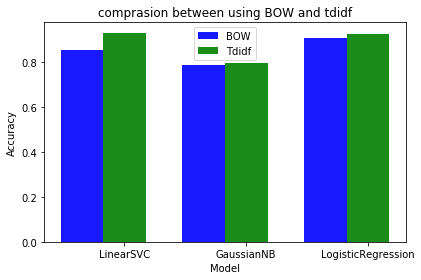

In [276]:
import numpy as np
import matplotlib.pyplot as plt
 
n_groups = 3 # number of models

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.9
 
rects1 = plt.bar(index, bow_res, bar_width,
                 alpha=opacity,
                 color='b',
                 label='BOW')
 
rects2 = plt.bar(index + bar_width, tdidf_res, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Tdidf')
 
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('comprasion between using BOW and tdidf')
plt.xticks(index + bar_width, name_res) 
plt.legend()
 
plt.tight_layout()
plt.show()

as we can notice using tdidf gave us the same or even better results.

*Remark:* from this point, we will use only tfidf, because we got equal or better result with tfidf, and at the end we plan to make one strong single model from the models we trained (so it has to be trained on the same data).

### Random Forest
last algorithm we will use is *"Random Forest"*, this is an ensemble tool which takes a subset of observations and a subset of variables to build a decision trees.  


#### parameter meaning and tuning:  
*max_features* - these are the maximum number of features Random Forest is allowed to try in individual tree. if we increase the value of this feature it improves the performance of the model because each node now has higher number of options to be considered. and therefore we chose 'auto' value, which means all the features.  
*n_jobs* - This parameter tells the engine how many processors is it allowed to use, we will use the value of -1 that means there is no restriction. (notice: this feature is different from the others, because it will improve only the training speed and not the performance)  

for tuning the other parameters we will use gridsearchCV and some guides we read on the internet for this task.

In [277]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 80,n_jobs = -1, max_features='auto')

def plot_evaluate_parameter(parameter, num_range, index):
    grid_search = GridSearchCV(rf, param_grid = {parameter: num_range})
    grid_search.fit(tfidf_asArray, target) # As we said, we will use ONLY tfidf
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    #ploting the results
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df


we will train random forest on our data with sets of values for each parameter. we set resonable values for each parameters, and we will choose the best score for each one. as you can guess there is a chance that "the best" value for a parameter is out from the gap we set, in this case we will miss this value :( .  (but it still be better from the default values) 

C:\Users\shavit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\shavit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\shavit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\shavit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The g

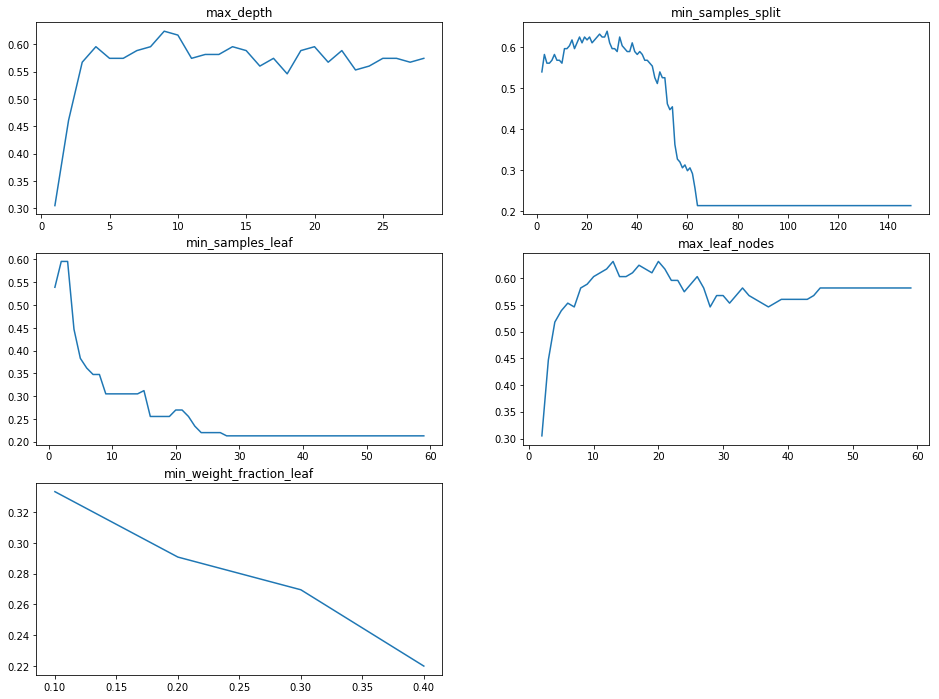

In [278]:
param_grid = {"max_depth": np.arange(1, 29, 1),
              "min_samples_split": np.arange(2,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    plot_evaluate_parameter(parameter, param_range, index)
    index += 1

let's explain how we will decide with which parameters to practice our Random Forest model:

*n_estimators* - the number of trees we want to build before taking the maximum voting or averages of predictions. from lectures and articles we read in the internet we concluded that we should choose value as high as our processor can handle because this will make our predictions stronger and more stable. and therefore we chose 800. ( we tried to fit the machine learning with lower values but each tine the result was different, until we got to this value, and got stable result)  
*min_weight_fraction_leaf* - we can see that the highest score is with values around 0, the default value is 0, so we will not set value for this.  
*max_leaf_nodes* - we can see that the best score is with values in range of ~[16,22], so we will set with this values.  
*min_samples_leaf* - we can see that best score is with values in range of ~[1,3] (the default is 1 but maybe we can get better)  
*min_samples_split*-  we can see that best score is with values in range of ~[27,30] (default is 2)  
*max_depth* -  we can see that best score is with values in range of ~[8,10]

to notice the power of parameter tuning, let's first run the model with the default values, and later with the values we mentioned.

In [279]:
from sklearn.ensemble import RandomForestClassifier
param_grid = dict()
forest = RandomForestClassifier(n_estimators = 500,n_jobs = -1, max_features='auto')
grid=GridSearchCV(forest,param_grid,cv=10,scoring='accuracy')
classification_model(forest,grid,1,"randomForest")


Result using TFIDF:

Accuracy : 70.000%
Cross-Validation Score: 0.801418439716 
std : 0.103989921586
best params: {} 


In [280]:
param_grid = {"max_depth": range(15, 17),
              "min_samples_split": range(27,30),
              "min_samples_leaf": range(1,3),
              "max_leaf_nodes": range(16, 22)}
forest_improved = RandomForestClassifier(n_estimators = 500,n_jobs = -1, max_features='auto')
grid=GridSearchCV(forest_improved,param_grid,cv=10,scoring='accuracy')
classification_model(forest_improved,grid,1,"randomForest_improved")


Result using TFIDF:

Accuracy : 70.000%
Cross-Validation Score: 0.872340425532 
std : 0.0973726353684
best params: {'max_depth': 15, 'max_leaf_nodes': 16, 'min_samples_leaf': 2, 'min_samples_split': 29} 


** as we can see, the results are much better **

##### Okay we have some learning machines not bad at all, let's try to unite them into one even stronger!

for this, we will use votingClassifier to ensemble our models

### VotingClassifier

#### parameter meaning and tuning:  
we willuse only estimators variable that get all the models to include in the ensemble.  
first, we will take the TOP THREE models, for this let's plot the results:

In [281]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%s' % "{0:.3%}".format(height),
                ha='center', va='bottom')

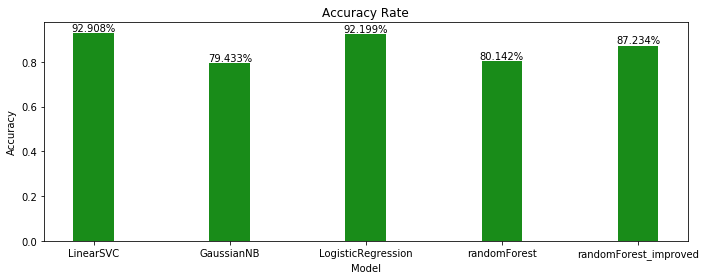

In [282]:
import numpy as np
import matplotlib.pyplot as plt
 
n_groups = 5 # number of models
#plt.subplots(figsize=(13,8))

# create plot
fig, ax = plt.subplots(figsize=(10,4))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.9
 
rects = plt.bar(index + bar_width, tdidf_res, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Tdidf')
autolabel(rects)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Rate')
plt.xticks(index + bar_width, name_res) 
 
plt.tight_layout()
plt.show()

as we can see top three are:  
* LinearSVC
* randomForest (improved)
* LogisticRegression

now, we will initiate each model with "the best" parameters we found:

In [283]:
forest_improved = RandomForestClassifier(n_estimators = 500,n_jobs = -1, max_features='auto', 
                                         max_depth = 16, max_leaf_nodes = 16, min_samples_leaf = 2 , 
                                         min_samples_split = 27)

lg = LogisticRegression(dual =True, C=10)

svc_linear = LinearSVC(dual = False,max_iter=1000,random_state = 80) 

and train the model:

In [284]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[ ('SVC_LINEAR',svc_linear),('LG',lg), ("rf",forest_improved)])
param_grid=dict()
grid=GridSearchCV(vc,param_grid,cv=10,scoring='accuracy')
classification_model(vc,grid,1,"VotingClassifier")


Result using TFIDF:

Accuracy : 93.333%
Cross-Validation Score: 0.914893617021 
std : 0.055642268589
best params: {} 


So... which model is the best !? let's see:

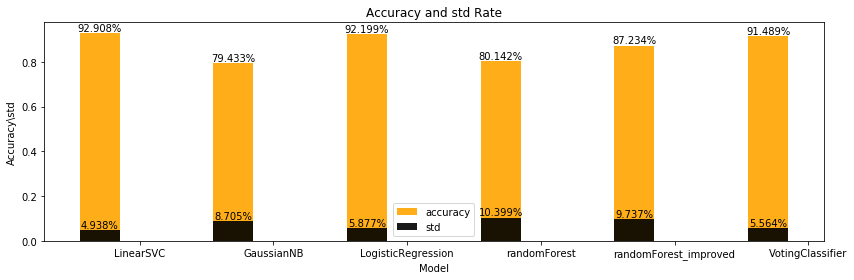

In [310]:
import numpy as np
import matplotlib.pyplot as plt
        
n_groups = 6 # number of models
#plt.subplots(figsize=(13,8))

# create plot
fig, ax = plt.subplots(figsize=(12,4))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.9
 
rects = plt.bar(index, tdidf_res, bar_width,
                 alpha=opacity,
                 color='orange',
                 label='accuracy')
rects2 = plt.bar(index , stdTFIDF_res, bar_width,
                 alpha=opacity,
                 color='black',
                 label='std')

autolabel(rects)
autolabel(rects2)
plt.xlabel('Model')
plt.ylabel('Accuracy\std')
plt.title('Accuracy and std Rate')
plt.xticks(index + bar_width, name_res) 
plt.legend()
plt.tight_layout()
plt.show()

as we can see, LinearSVC, LogisticRegression and votingClassifier have almost the same accuracy results, but LinearSVC has the highest accuracy and the lowest std so we will choose this model as our classification model in part 4.

### Save models for future use

we will save the chosen model nad the tfidfVectorizer for later use. (at part 4)  
inititate the model:

In [296]:
svc_linear = LinearSVC(dual = False,max_iter=1000,random_state = 80) 
grid=GridSearchCV(svc_linear,dict(),cv=10,scoring='accuracy')
grid.fit(features_tfidf,target)
grid.best_score_

0.92907801418439717

use pickle packages in order to save the model:

In [297]:
import pickle
filename = 'LinearSVC_Model.sav'
pickle.dump(grid, open(./modelSave/filename, 'wb'))

In [298]:
filename = 'TfidfVectorizer.sav'
pickle.dump(tfidfvectorizer, open(./modelSave/filename, 'wb'))